# Ballistic Deposition with Relaxation

Surface growth model including particle relaxation mechanisms. Studies how local relaxation processes smooth surfaces and affect long-term growth behavior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import time

In [2]:
#a function to find the smallest value amoung 3 numbers
def smallest(a, b, c):
    if a >= b:
        if c >= b:
            return b
        else:
            return c
    else:
        if c < a:
            return c
        elif c == a:
            rand = [a, c]
            return random.choice(rand)
        else:
            return a


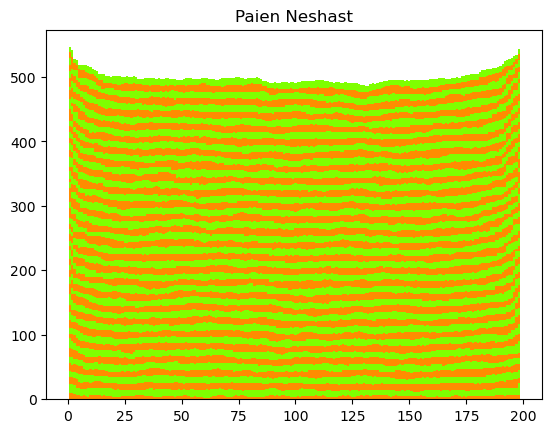

In [3]:
# Paeinneshast for x particles in an array of size L computing w also
x = 100000
L = 200
line     = np.zeros(L) 
myBottom = np.zeros(L-2) 
T     = np.arange(x)
h_av  = np.zeros(x)
h2_av = np.zeros(x)
w     = np.zeros(x)

color = np.array(['darkorange', 'chartreuse'])

#boundary condition
line[0]   = x
line[L-1] = x

for t in T:
    c = int(t/(10 * L))%2

    i = int(random.random() * L)
    
    s = smallest(line[(L+i-1)%L], line[i], line[(i+1)%L])
    if line[i] == s:
        line[i] += 1
    elif line[(i+1)%L] == s:
        line[(i+1)%L] += 1
    else:
        line[(L+i-1)%L] += 1
        
        
    h_av[t]  = np.mean(line[1:(L-1)])
    h2_av[t] = np.mean(line[1:(L-1)] ** 2)
    w[t]     = np.sqrt(h2_av[t]-h_av[t] ** 2)
    
    if t%1000 == 0:
        p = np.arange(L)
        plt.bar(p[1:(L-1)], line[1:(L-1)]-myBottom, bottom = myBottom, width = 1, color = color[c])
        myBottom = np.copy(line[1:(L-1)])

plt.title("Paien Neshast")
plt.savefig('PaienNesh.png')
plt.show()  

In [4]:
%%time

#same, looking for a faster algorithm

x = 10000
L = 200
line     = np.zeros(L) 
myBottom = np.zeros(L-2) 
T     = np.arange(x)

m = int(np.floor(np.log2(x)+1))
w     = np.zeros(m)

color = np.array(['darkorange', 'chartreuse'])

#boundary condition
line[0]   = x
line[L-1] = x

for t in T:
    c = int(t/(10 * L))%2

    i = int(random.random() * L)
    
    s = smallest(line[(L+i-1)%L], line[i], line[(i+1)%L])
    if line[i] == s:
        line[i] += 1
    elif line[(i+1)%L] == s:
        line[(i+1)%L] += 1
    else:
        line[(L+i-1)%L] += 1
    
    if np.log2(t)%1 == 0:
        w[int(np.log2(t))] = np.std(line[1:(L-1)]) 

print(w)

[0.0999949  0.12215542 0.15689116 0.2082989  0.28015512 0.372678
 0.4802231  0.61527092 0.73656037 0.771538   0.92335885 1.28894786
 1.69998079 2.16560686]
CPU times: user 14 ms, sys: 1.02 ms, total: 15 ms
Wall time: 15 ms


<timed exec>:31: RuntimeWarning: divide by zero encountered in log2


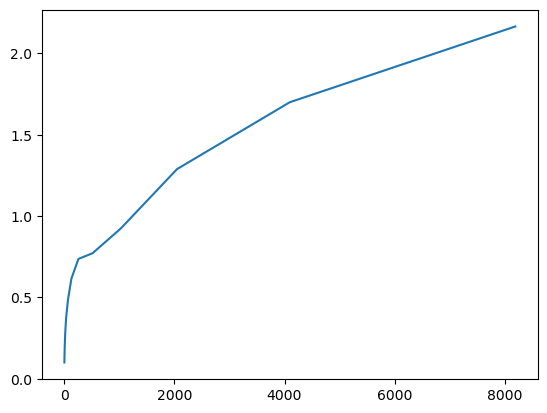

In [5]:
#here is how we should plot w versus t

plt.plot(2 ** np.arange(m), w)

In [6]:
def PaeinNesh(x, L):
    line     = np.zeros(L) 
    myBottom = np.zeros(L-2) 
    T     = np.arange(x)

    m = int(np.floor(np.log2(x)+1))
    w     = np.zeros(m)

    color = np.array(['darkorange', 'chartreuse'])

    #boundary condition
    line[0]   = x
    line[L-1] = x

    for t in T:
        c = int(t/(10 * L))%2

        i = int(random.random() * L)

        s = smallest(line[(L+i-1)%L], line[i], line[(i+1)%L])
        if line[i] == s:
            line[i] += 1
        elif line[(i+1)%L] == s:
            line[(i+1)%L] += 1
        else:
            line[(L+i-1)%L] += 1

        if np.log2(t)%1 == 0:
            w[int(np.log2(t))] = np.std(line[1:(L-1)]) 
    return w


In [7]:
N = 20
x = 10000000
L = 200
m = int(np.floor(np.log2(x)))+1
ws = np.zeros((N, m))
for n in range(N):
    ws[n] = PaeinNesh(x, L)


/var/folders/tm/r66jhs6d1dn78h8vczcd1wlm0000gn/T/ipykernel_26056/1158615264.py:28: RuntimeWarning: divide by zero encountered in log2
  if np.log2(t)%1 == 0:


In [8]:
w_av = np.zeros(m)
for t in range(m):
    w_av[t] = np.mean(ws[:, t]) 

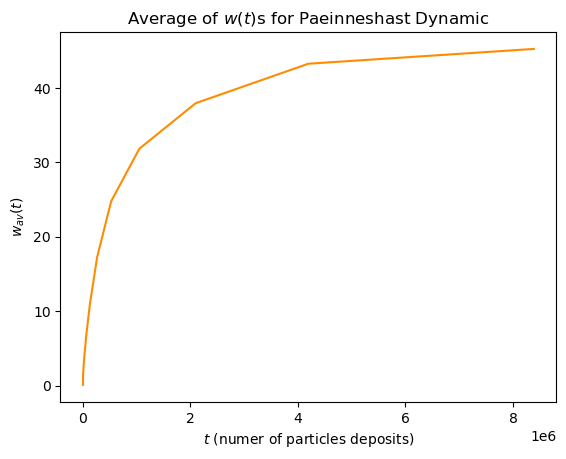

In [9]:
plt.plot(2 ** np.arange(m), w_av, c = 'darkorange')
plt.title("Average of $w(t)$s for Paeinneshast Dynamic")
plt.ylabel("$w_{av}(t)$")
plt.xlabel("$t$ (numer of particles deposits)")
plt.savefig('wavp.png')

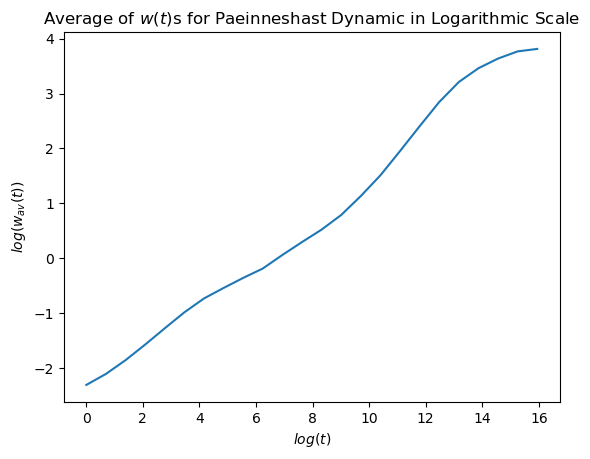

In [10]:
plt.plot(np.log(2 ** np.arange(m)), np.log(w_av))
plt.title("Average of $w(t)$s for Paeinneshast Dynamic in Logarithmic Scale")
plt.ylabel("$log(w_{av}(t))$")
plt.xlabel("$log(t)$")
plt.savefig('logwavp.png')

In [11]:
np.shape(w_av)
print(w_av[0:24])

[ 0.0999949   0.12215542  0.15689116  0.2082989   0.28015512  0.37467511
  0.48212526  0.58350075  0.70081834  0.83144283  1.06397912  1.34547419
  1.68801285  2.20251927  3.10812796  4.53212983  7.04599267 11.06759818
 17.20180369 24.75836768 31.82068868 37.93837782 43.23863824 45.22535827]


In [12]:
#finding beta

beta = np.polyfit(np.log10(2 ** np.arange(m)[0:21]), np.log10(w_av[0:21]),1)
print("\u03B2 =", np.round(beta[0], 4))
print(beta)

β = 0.4053
[ 0.40528836 -1.08976453]


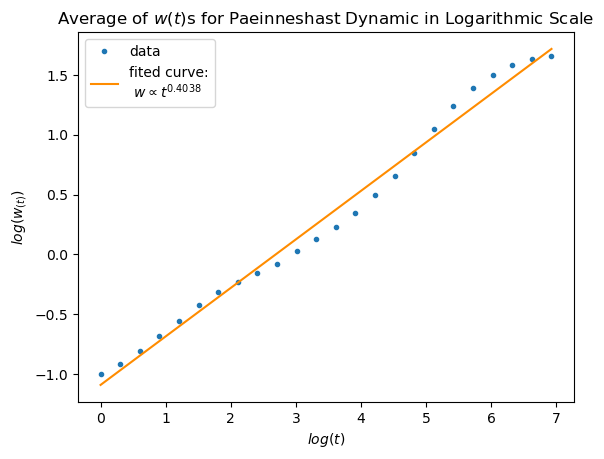

In [13]:
plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.', label = 'data')
plt.title("Average of $w(t)$s for Paeinneshast Dynamic in Logarithmic Scale")
plt.ylabel("$log(w_{(t)})$")
plt.xlabel("$log(t)$")
plt.plot(np.log10(2 ** np.arange(m)), beta[0] * np.log10(2 ** np.arange(m)) + beta[1], c = 'darkorange', label = 'fited curve:\n $w \propto t^{0.4038}$')
plt.legend()
plt.savefig('betap.png')

try to do the same for $10^8$ particle to watch better!

In [14]:
%%time
N = 1
x = 100000000
L = 200
m = int(np.floor(np.log2(x)))+1
ws = np.zeros((N, m))
for n in range(N):
    ws[n] = PaeinNesh(x, L)


/var/folders/tm/r66jhs6d1dn78h8vczcd1wlm0000gn/T/ipykernel_26056/1158615264.py:28: RuntimeWarning: divide by zero encountered in log2
  if np.log2(t)%1 == 0:


CPU times: user 1min 52s, sys: 1.31 s, total: 1min 53s
Wall time: 1min 54s


β = 0.3936


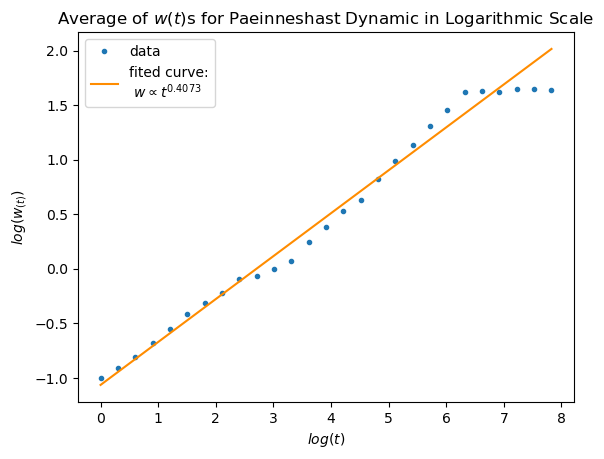

In [15]:
w_av = np.zeros(m)
for t in range(m):
    w_av[t] = np.mean(ws[:, t]) 
    
#finding beta

beta = np.polyfit(np.log10(2 ** np.arange(m)[0:21]), np.log10(w_av[0:21]),1)
print("\u03B2 =", np.round(beta[0], 4))

plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.', label = 'data')
plt.title("Average of $w(t)$s for Paeinneshast Dynamic in Logarithmic Scale")
plt.ylabel("$log(w_{(t)})$")
plt.xlabel("$log(t)$")
plt.plot(np.log10(2 ** np.arange(m)), beta[0] * np.log10(2 ** np.arange(m)) + beta[1], c = 'darkorange', label = 'fited curve:\n $w \propto t^{0.4073}$')
plt.legend()
plt.savefig('betap8.png')

#### Finding z
$t_s \propto L^z$ 

/var/folders/tm/r66jhs6d1dn78h8vczcd1wlm0000gn/T/ipykernel_26056/1158615264.py:28: RuntimeWarning: divide by zero encountered in log2
  if np.log2(t)%1 == 0:


[0.4330127  0.50530768 0.61123149 0.72603228 0.91550899 1.08076388
 1.07865754 1.81863416 1.53896676 2.10499436 2.07943892 1.62571086
 1.81859951 1.37580637 1.87294857 1.74516407 1.40739486 1.45369572
 2.64270846]
[0.31426968 0.372678   0.45894553 0.56771442 0.704122   0.87928147
 1.1232276  1.5490295  1.82819639 2.51707672 3.41849065 3.90949795
 3.72416445 3.19674419 4.56216331 3.71442604 4.94442483 3.87685818
 4.54761113]
[0.31426968 0.372678   0.45894553 0.56771442 0.704122   0.87928147
 1.1232276  1.5490295  1.82819639 2.51707672 3.41849065 3.90949795
 3.72416445 3.19674419 4.56216331 3.71442604 4.94442483 3.87685818
 4.54761113]
[0.22329688 0.2696566  0.33803244 0.43673441 0.5265948  0.59378208
 0.74719865 0.93200941 1.20216344 1.78269294 2.55790256 3.63370133
 5.26807022 6.78791368 7.61426456 8.2082101  9.64637691 8.98058496
 8.93565688]
[0.22329688 0.2696566  0.33803244 0.43673441 0.5265948  0.59378208
 0.74719865 0.93200941 1.20216344 1.78269294 2.55790256 3.63370133
 5.2680702

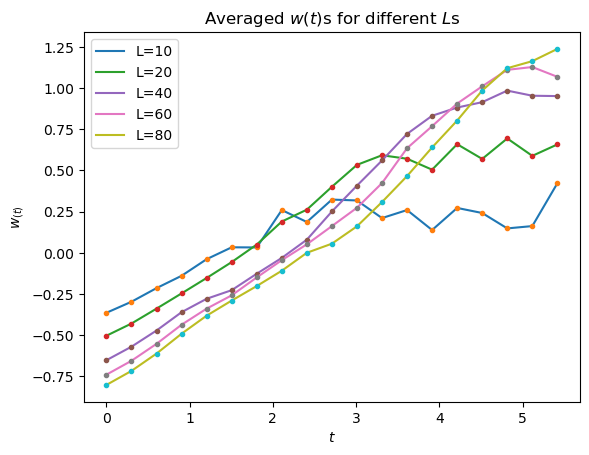

In [16]:
%%time
N = 10
x = 100000 * 5

L_mat = [10, 20, 40, 60, 80]
for L in L_mat:
    m = int(np.floor(np.log2(x)))+1
    ws = np.zeros((N, m))
    for n in range(N):
        ws[n] = PaeinNesh(x, L)

    w_av = np.zeros(m)
    for t in range(m):
        w_av[t] = np.mean(ws[:, t]) 

    plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), label = 'L={}'.format(L))
    plt.plot(np.log10(2 ** np.arange(m)), np.log10(w_av), '.')
    print(w_av)
plt.title("Averaged $w(t)$s for different $L$s")
plt.ylabel("$w_{(t)}$")
plt.xlabel("$t$")
plt.legend()
plt.savefig("save.png")

z = 3.1787
[ 3.17869804 -0.96847581]


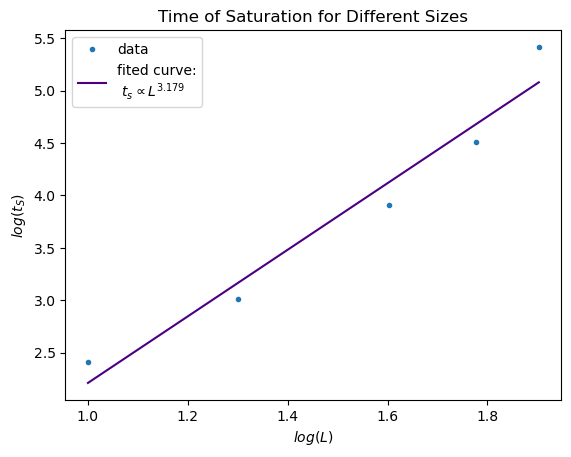

In [17]:
x = [2**8, 2**10, 2**13, 2**15, 2**18]
plt.plot(np.log10(L_mat), np.log10(x), '.', label = 'data')

z = np.polyfit(np.log10(L_mat), np.log10(x),1)

plt.plot(np.log10(L_mat), z[0]*np.log10(L_mat)+z[1], '-', c = 'indigo', label = 'fited curve:\n $t_s \propto L^{3.179} $')
plt.legend()
plt.title("Time of Saturation for Different Sizes")
plt.ylabel("$log(t_S)$")
plt.xlabel("$log(L)$")
print("z =", np.round(z[0], 4))
print(z)
plt.savefig("z.png")

In [18]:
alpha = 0.4073 *z[0]
alpha

1.294683710811989